# Object Oriented Programming

Based on https://www.tutorialspoint.com/python/python_classes_objects.htm

We've seen a lot of examples of **objects** in Python. We create a string object with quote marks:

In [1]:
class empty():
    pass
a=empty()
print(type(a))
a.new =1

def fb1():
    pass
a.func1 = fb1
a.num1 =3
dir(a)

<class '__main__.empty'>


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'func1',
 'new',
 'num1']

In [2]:
mystring = "Hi there"

In [3]:
dir(mystring)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


and we have a bunch of methods we can use on the object:

In [4]:
mystring.split("i")

['H', ' there']

In [5]:
mystring.startswith('Hi')

True

In [6]:
len(mystring)

8

Object oriented programming simply gives you the tools to define objects and methods for yourself. It's useful anytime you want to keep some data (like the characters in the string) tightly coupled to the functions that act on the data (length, split, startswith, etc.).

As an example, we're going to bundle the functions we did to make the 1d harmonic oscillator eigenfunctions with arbitrary potentials, so we can pass in a function defining that potential, some additional specifications, and get out something that can plot the orbitals, as well as do other things with them, if desired.

In [7]:
class Schrod1d:
    """\
    Schrod1d: Solver for the one-dimensional Schrodinger equation.
    """
    def __init__(self,V,start=0,end=1,npts=50,**kwargs):
        m = kwargs.get('m',1.0)
        self.x = np.linspace(start,end,npts)
        self.Vx = V(self.x)
        self.H = (-0.5/m)*self.laplacian() + np.diag(self.Vx)
        return
    
    def plot(self,*args,**kwargs):
        titlestring = kwargs.get('titlestring',"Eigenfunctions of the 1d Potential")
        xstring = kwargs.get('xstring',"Displacement (bohr)")
        ystring = kwargs.get('ystring',"Energy (hartree)")
        if not args:
            args = [3]
        x = self.x
        E,U = np.linalg.eigh(self.H)
        h = x[1]-x[0]

        # Plot the Potential
        plt.figure(figsize=(8,8))
        plt.plot(x,self.Vx,color='k')

        for i in range(*args):
            # For each of the first few solutions, plot the energy level:
            plt.axhline(y=E[i],color='k',ls=":")
            # as well as the eigenfunction, displaced by the energy level so they don't
            # all pile up on each other:
            plt.plot(x,U[:,i]/np.sqrt(h)+E[i])
        plt.title(titlestring)
        plt.xlabel(xstring)
        plt.ylabel(ystring)
        plt.plot()
        return
        
    def laplacian(self):
        x = self.x
        h = x[1]-x[0] # assume uniformly spaced points
        n = len(x)
        M = -2*np.identity(n,'d')
        for i in range(1,n):
            M[i,i-1] = M[i-1,i] = 1
        return M/h**2

The `__init__()` function specifies what operations go on when the object is created. The `self` argument is the object itself, and we don't pass it in. The only required argument is the function that defines the QM potential. We can also specify additional arguments that define the numerical grid that we're going to use for the calculation.

For example, to do an infinite square well potential, we have a function that is 0 everywhere. We don't have to specify the barriers, since we'll only define the potential in the well, which means that it can't be defined anywhere else.

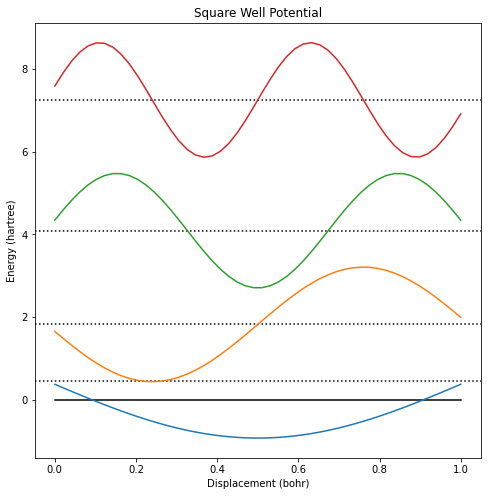

In [8]:
import numpy as np
import matplotlib.pyplot as plt
square_well = Schrod1d(lambda x: 0*x,m=10)
square_well.plot(4,titlestring="Square Well Potential")

We can similarly redefine the Harmonic Oscillator potential.

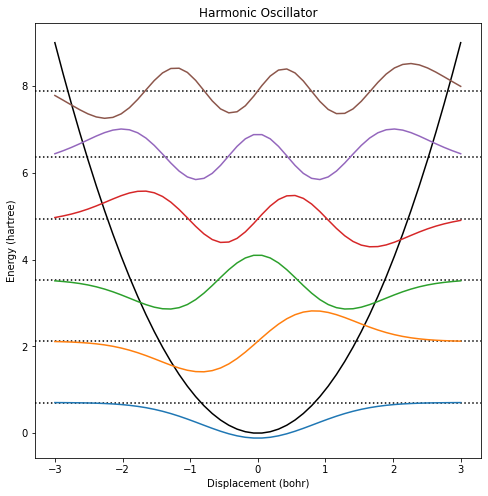

In [9]:
ho = Schrod1d(lambda x: x**2,start=-3,end=3)
ho.plot(6,titlestring="Harmonic Oscillator")

Let's define a finite well potential:

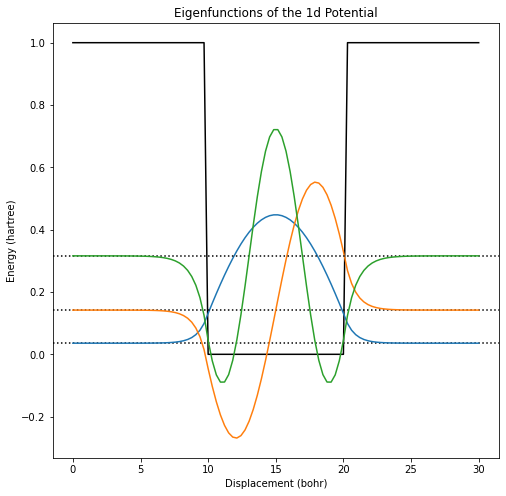

In [10]:
def finite_well(x,V_left=1,V_well=0,V_right=1,d_left=10,d_well=10,d_right=10):
    V = np.zeros(x.size,'d')
    for i in range(x.size):
        if x[i] < d_left: 
            V[i] = V_left
        elif x[i] > (d_left+d_well):
            V[i] = V_right
        else:
            V[i] = V_well
    return V
        
fw = Schrod1d(finite_well,start=0,end=30,npts=100)
fw.plot()

A triangular well:

In [11]:
def triangular(x,F=30): return F*x

tw = Schrod1d(triangular,m=10)
tw.plot()

Or we can combine the two, making something like a semiconductor quantum well with a top gate:

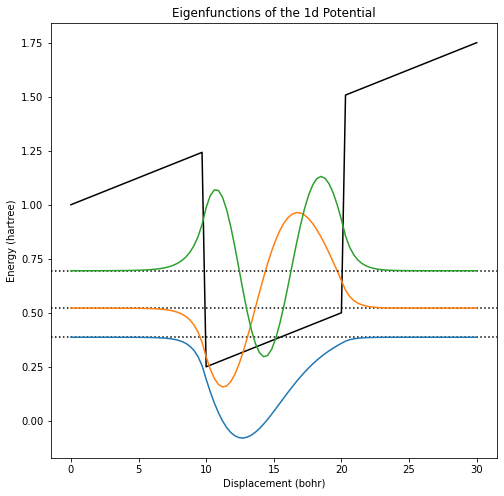

In [12]:
def tri_finite(x): return finite_well(x)+triangular(x,F=0.025)

tfw = Schrod1d(tri_finite,start=0,end=30,npts=100)
tfw.plot()

There's a lot of philosophy behind object oriented programming. Since I'm trying to focus on just the basics here, I won't go into them, but the internet is full of lots of resources on OO programming and theory. The best of this is contained in the [Design Patterns](http://en.wikipedia.org/wiki/Design_Patterns_(book)) book, which I highly recommend.